In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
%matplotlib inline

In [2]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
tf.config.experimental.set_virtual_device_configuration( gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3700)])

In [3]:
tf.__version__

'2.0.1'

In [4]:
tf.test.is_gpu_available()

True

In [5]:
def img_augument(img,lab):
    img = tf.image.random_flip_left_right(img)
#     img = tf.image.random_flip_up_down(img)
    img = tf.image.random_brightness(img, 0.2)
    img = tf.image.random_hue(img,0.1)
    img = tf.image.random_contrast(img, 0.5, 2)
    return img, lab

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()  #50000 train, 10000 test
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

In [7]:
'''
batch size 
'''

batch_size = 50   ## this is what previous tests are done with
# batch_size = 5
autotune=tf.data.experimental.AUTOTUNE
buffer_size = x_train.shape[0]

In [8]:
category_index=[]     # if want to reduce the training set

for i in range(10):
    index0 = np.where(y_train == i)
    index = index0[0]
    np.random.shuffle(index)
    category_index.append(index)

new_index=[]
for i in range(10):
    new_index.append(category_index[i][0:1600])    
new_index=np.concatenate(new_index)
new_index.shape

(16000,)

In [9]:
augment=False
x_tr=tf.data.Dataset.from_tensor_slices(x_train[new_index])
y_tr=tf.data.Dataset.from_tensor_slices(y_train[new_index])
train_set=tf.data.Dataset.zip((x_tr, y_tr))
if augment==True:
    train_set=train_set.map(img_augument).shuffle(buffer_size,reshuffle_each_iteration=True).repeat().batch(batch_size).prefetch(buffer_size=autotune)
else:
    train_set=train_set.shuffle(buffer_size,reshuffle_each_iteration=True).repeat().batch(batch_size).prefetch(buffer_size=autotune)

In [10]:
x_te=tf.data.Dataset.from_tensor_slices(x_test)
y_te=tf.data.Dataset.from_tensor_slices(y_test)
test_set=tf.data.Dataset.zip((x_te, y_te))
test_set=test_set.repeat().batch(200).prefetch(buffer_size=autotune)

In [11]:
from models import ANN_model

model=ANN_model()

In [12]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500)

In [13]:
history=model.fit(train_set,
                  epochs=5000,
                  steps_per_epoch=new_index.shape[0]//batch_size,
                  validation_data=test_set,
                  validation_steps=10000//200,
                  callbacks=[es_callback],
                  verbose=1)


Train for 320 steps, validate for 50 steps
Epoch 1/5000
320/320 [==============================] - 7s 21ms/step - loss: 2.2148 - acc: 0.2268 - val_loss: 1.8776 - val_acc: 0.3221
Epoch 2/5000
320/320 [==============================] - 4s 11ms/step - loss: 1.7027 - acc: 0.3783 - val_loss: 1.4281 - val_acc: 0.4833
Epoch 3/5000
320/320 [==============================] - 4s 11ms/step - loss: 1.4974 - acc: 0.4538 - val_loss: 1.5842 - val_acc: 0.4472
Epoch 4/5000
320/320 [==============================] - 4s 11ms/step - loss: 1.3489 - acc: 0.5187 - val_loss: 1.2050 - val_acc: 0.5730
Epoch 5/5000
320/320 [==============================] - 4s 11ms/step - loss: 1.2397 - acc: 0.5642 - val_loss: 1.2179 - val_acc: 0.5660
Epoch 6/5000
320/320 [==============================] - 4s 11ms/step - loss: 1.1509 - acc: 0.5979 - val_loss: 1.0459 - val_acc: 0.6360
Epoch 7/5000
320/320 [==============================] - 4s 11ms/step - loss: 1.0794 - acc: 0.6233 - val_loss: 1.1697 - val_acc: 0.5920
Epoch 8/5000

Epoch 61/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.2098 - acc: 0.9276 - val_loss: 1.0108 - val_acc: 0.7469
Epoch 62/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.2162 - acc: 0.9263 - val_loss: 0.9790 - val_acc: 0.7546
Epoch 63/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.2237 - acc: 0.9249 - val_loss: 0.9942 - val_acc: 0.7504
Epoch 64/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.2231 - acc: 0.9254 - val_loss: 0.9435 - val_acc: 0.7475
Epoch 65/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.2250 - acc: 0.9233 - val_loss: 0.9334 - val_acc: 0.7599
Epoch 66/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.2105 - acc: 0.9263 - val_loss: 0.9644 - val_acc: 0.7557
Epoch 67/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.2131 - acc: 0.9283 - val_loss: 0.9755 - val_acc: 0.7522
Epoch 68/5000
320/320 [=========================

320/320 [==============================] - 4s 12ms/step - loss: 0.1276 - acc: 0.9567 - val_loss: 1.0498 - val_acc: 0.7515
Epoch 122/5000
320/320 [==============================] - 4s 12ms/step - loss: 0.1333 - acc: 0.9555 - val_loss: 1.0004 - val_acc: 0.7576
Epoch 123/5000
320/320 [==============================] - 4s 12ms/step - loss: 0.1352 - acc: 0.9564 - val_loss: 1.0169 - val_acc: 0.7574
Epoch 124/5000
320/320 [==============================] - 4s 12ms/step - loss: 0.1255 - acc: 0.9557 - val_loss: 0.9898 - val_acc: 0.7616
Epoch 125/5000
320/320 [==============================] - 4s 12ms/step - loss: 0.1290 - acc: 0.9563 - val_loss: 1.0420 - val_acc: 0.7609
Epoch 126/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.1434 - acc: 0.9531 - val_loss: 1.0698 - val_acc: 0.7617
Epoch 127/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.1305 - acc: 0.9571 - val_loss: 0.9848 - val_acc: 0.7599
Epoch 128/5000
320/320 [==============================] 

Epoch 181/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.1043 - acc: 0.9659 - val_loss: 1.0315 - val_acc: 0.7593
Epoch 182/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.1031 - acc: 0.9665 - val_loss: 1.0481 - val_acc: 0.7624
Epoch 183/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.1098 - acc: 0.9646 - val_loss: 1.0506 - val_acc: 0.7639
Epoch 184/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.0997 - acc: 0.9666 - val_loss: 1.0588 - val_acc: 0.7569
Epoch 185/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.0937 - acc: 0.9686 - val_loss: 1.0435 - val_acc: 0.7634
Epoch 186/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.0968 - acc: 0.9688 - val_loss: 1.0210 - val_acc: 0.7682
Epoch 187/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.1021 - acc: 0.9660 - val_loss: 1.0672 - val_acc: 0.7629
Epoch 188/5000
320/320 [=================

320/320 [==============================] - 3s 11ms/step - loss: 0.0864 - acc: 0.9711 - val_loss: 1.1047 - val_acc: 0.7639
Epoch 241/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0798 - acc: 0.9746 - val_loss: 1.1224 - val_acc: 0.7644
Epoch 242/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0884 - acc: 0.9701 - val_loss: 1.0769 - val_acc: 0.7632
Epoch 243/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0885 - acc: 0.9719 - val_loss: 1.0640 - val_acc: 0.7639
Epoch 244/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.0830 - acc: 0.9733 - val_loss: 1.1348 - val_acc: 0.7521
Epoch 245/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0840 - acc: 0.9716 - val_loss: 1.0356 - val_acc: 0.7672
Epoch 246/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0858 - acc: 0.9721 - val_loss: 1.1050 - val_acc: 0.7622
Epoch 247/5000
320/320 [==============================] 

Epoch 300/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.0742 - acc: 0.9758 - val_loss: 1.0867 - val_acc: 0.7622
Epoch 301/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.0711 - acc: 0.9769 - val_loss: 1.1622 - val_acc: 0.7633
Epoch 302/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.0815 - acc: 0.9753 - val_loss: 1.0749 - val_acc: 0.7675
Epoch 303/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0735 - acc: 0.9776 - val_loss: 1.0951 - val_acc: 0.7661
Epoch 304/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0751 - acc: 0.9762 - val_loss: 1.0980 - val_acc: 0.7696
Epoch 305/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.0729 - acc: 0.9771 - val_loss: 1.0786 - val_acc: 0.7638
Epoch 306/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.0704 - acc: 0.9762 - val_loss: 1.1076 - val_acc: 0.7646
Epoch 307/5000
320/320 [=================

Epoch 360/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0661 - acc: 0.9804 - val_loss: 1.0772 - val_acc: 0.7703
Epoch 361/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0615 - acc: 0.9808 - val_loss: 1.0998 - val_acc: 0.7671
Epoch 362/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0673 - acc: 0.9779 - val_loss: 1.1243 - val_acc: 0.7692
Epoch 363/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0711 - acc: 0.9776 - val_loss: 1.1166 - val_acc: 0.7619
Epoch 364/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0681 - acc: 0.9772 - val_loss: 1.1071 - val_acc: 0.7666
Epoch 365/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0627 - acc: 0.9806 - val_loss: 1.0992 - val_acc: 0.7660
Epoch 366/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0625 - acc: 0.9795 - val_loss: 1.1423 - val_acc: 0.7630
Epoch 367/5000
320/320 [=================

Epoch 420/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0596 - acc: 0.9799 - val_loss: 1.1135 - val_acc: 0.7656
Epoch 421/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0579 - acc: 0.9803 - val_loss: 1.1182 - val_acc: 0.7706
Epoch 422/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0660 - acc: 0.9784 - val_loss: 1.1081 - val_acc: 0.7733
Epoch 423/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0578 - acc: 0.9814 - val_loss: 1.1097 - val_acc: 0.7719
Epoch 424/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0563 - acc: 0.9803 - val_loss: 1.1450 - val_acc: 0.7687
Epoch 425/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0564 - acc: 0.9807 - val_loss: 1.1205 - val_acc: 0.7680
Epoch 426/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0575 - acc: 0.9816 - val_loss: 1.1180 - val_acc: 0.7726
Epoch 427/5000
320/320 [=================

Epoch 480/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0537 - acc: 0.9818 - val_loss: 1.1569 - val_acc: 0.7717
Epoch 481/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0533 - acc: 0.9831 - val_loss: 1.1356 - val_acc: 0.7752
Epoch 482/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.0454 - acc: 0.9849 - val_loss: 1.1485 - val_acc: 0.7742
Epoch 483/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.0517 - acc: 0.9831 - val_loss: 1.1636 - val_acc: 0.7729
Epoch 484/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0559 - acc: 0.9831 - val_loss: 1.1820 - val_acc: 0.7669
Epoch 485/5000
320/320 [==============================] - 4s 11ms/step - loss: 0.0585 - acc: 0.9812 - val_loss: 1.1396 - val_acc: 0.7740
Epoch 486/5000
320/320 [==============================] - 3s 11ms/step - loss: 0.0507 - acc: 0.9836 - val_loss: 1.1185 - val_acc: 0.7766
Epoch 487/5000
320/320 [=================

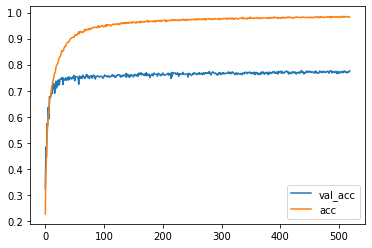

In [14]:
plt.plot(history.epoch, history.history.get('val_acc'),label='val_acc')
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.legend()

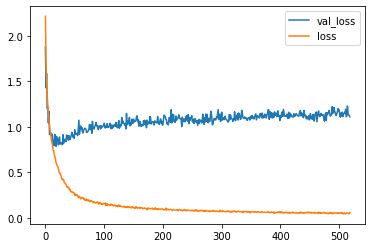

In [15]:
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.legend()

In [16]:
np.array(model.get_weights()).shape

(22,)

In [17]:
epo_h=history.epoch
loss_h=history.history.get('val_loss')
acc_h=history.history.get('val_acc')

arr = np.array([epo_h,loss_h,acc_h])

In [18]:
filename=os.path.join('result/zCentral','{}_central.batch{}.es500.npy'.format(new_index.shape[0],batch_size))
np.save(filename,arr)
print(filename)

result/zCentral\16000_central.batch50.es500.npy
